<a href="https://colab.research.google.com/github/seiji0203/Machine-Learning-Models/blob/master/overfiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/DNN_code/lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14333333333333334
                : 10. 正答率(テスト) = 0.0964
Generation: 20. 正答率(トレーニング) = 0.24666666666666667
                : 20. 正答率(テスト) = 0.1602
Generation: 30. 正答率(トレーニング) = 0.3433333333333333
                : 30. 正答率(テスト) = 0.2232
Generation: 40. 正答率(トレーニング) = 0.43333333333333335
                : 40. 正答率(テスト) = 0.2877
Generation: 50. 正答率(トレーニング) = 0.49333333333333335
                : 50. 正答率(テスト) = 0.3241
Generation: 60. 正答率(トレーニング) = 0.53
                : 60. 正答率(テスト) = 0.3598
Generation: 70. 正答率(トレーニング) = 0.5733333333333334
                : 70. 正答率(テスト) = 0.382
Generation: 80. 正答率(トレーニング) = 0.5833333333333334
                : 80. 正答率(テスト) = 0.4037
Generation: 90. 正答率(トレーニング) = 0.61
                : 90. 正答率(テスト) = 0.4176
Generation: 100. 正答率(トレーニング) = 0.6633333333333333
                : 100. 正答率(テスト) = 0.4469
Generation: 110. 正答率(トレーニング) = 0.6766666666666666
                : 110. 正答率(テスト) = 0.476
Generation: 120. 正答率(トレーニング) = 0.

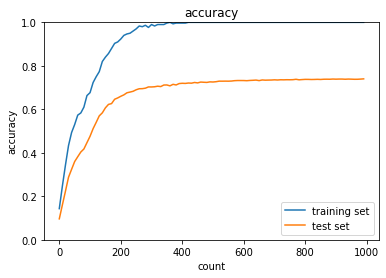

In [23]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2（L2正則化を行うことで過学習が僅かに改善されている）

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.18
                : 10. 正答率(テスト) = 0.147
Generation: 20. 正答率(トレーニング) = 0.31
                : 20. 正答率(テスト) = 0.2381
Generation: 30. 正答率(トレーニング) = 0.41
                : 30. 正答率(テスト) = 0.306
Generation: 40. 正答率(トレーニング) = 0.51
                : 40. 正答率(テスト) = 0.3576
Generation: 50. 正答率(トレーニング) = 0.5133333333333333
                : 50. 正答率(テスト) = 0.3727
Generation: 60. 正答率(トレーニング) = 0.58
                : 60. 正答率(テスト) = 0.3993
Generation: 70. 正答率(トレーニング) = 0.6066666666666667
                : 70. 正答率(テスト) = 0.4361
Generation: 80. 正答率(トレーニング) = 0.6133333333333333
                : 80. 正答率(テスト) = 0.4483
Generation: 90. 正答率(トレーニング) = 0.65
                : 90. 正答率(テスト) = 0.4958
Generation: 100. 正答率(トレーニング) = 0.6566666666666666
                : 100. 正答率(テスト) = 0.5196
Generation: 110. 正答率(トレーニング) = 0.6966666666666667
                : 110. 正答率(テスト) = 0.5574
Generation: 120. 正答率(トレーニング) = 0.7266666666666667
                : 120. 正答率(テスト) = 0.5814
Ge

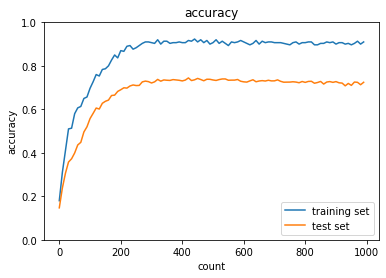

In [24]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減en_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.38333333333333336
                : 10. 正答率(テスト) = 0.3097
Generation: 20. 正答率(トレーニング) = 0.6033333333333334
                : 20. 正答率(テスト) = 0.4469
Generation: 30. 正答率(トレーニング) = 0.6566666666666666
                : 30. 正答率(テスト) = 0.4998
Generation: 40. 正答率(トレーニング) = 0.8133333333333334
                : 40. 正答率(テスト) = 0.6446
Generation: 50. 正答率(トレーニング) = 0.9066666666666666
                : 50. 正答率(テスト) = 0.721
Generation: 60. 正答率(トレーニング) = 0.9266666666666666
                : 60. 正答率(テスト) = 0.7272
Generation: 70. 正答率(トレーニング) = 0.82
                : 70. 正答率(テスト) = 0.6324
Generation: 80. 正答率(トレーニング) = 0.77
                : 80. 正答率(テスト) = 0.6359
Generation: 90. 正答率(トレーニング) = 0.94
                : 90. 正答率(テスト) = 0.7459
Generation: 100. 正答率(トレーニング) = 0.86
                : 100. 正答率(テスト) = 0.676
Generation: 110. 正答率(トレーニング) = 0.9266666666666666
                : 110. 正答率(テスト) = 0.7399
Generation: 120. 正答率(トレーニング) = 0.43666666666666665
             

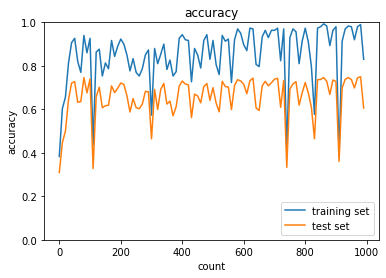

In [25]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


## weigth_decay_lambdaの値を変更


## Dropout

In [26]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.08666666666666667
                : 10. 正答率(テスト) = 0.0905
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1016
Generation: 30. 正答率(トレーニング) = 0.13
                : 30. 正答率(テスト) = 0.1142
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.1168
Generation: 50. 正答率(トレーニング) = 0.13666666666666666
                : 50. 正答率(テスト) = 0.1285
Generation: 60. 正答率(トレーニング) = 0.15333333333333332
                : 60. 正答率(テスト) = 0.1417
Generation: 70. 正答率(トレーニング) = 0.18333333333333332
                : 70. 正答率(テスト) = 0.157
Generation: 80. 正答率(トレーニング) = 0.21
                : 80. 正答率(テスト) = 0.1833
Generation: 90. 正答率(トレーニング) = 0.22666666666666666
                : 90. 正答率(テスト) = 0.1988
Generation: 100. 正答率(トレーニング) = 0.25666666666666665
                : 100. 正答率(テスト) = 0.2157
Generation: 110. 正答率(トレーニング) = 0.2633333333333333
                : 110. 正答率(テスト) = 0.2277
Generation: 120. 正答率(トレーニング) = 0.29333333333333333
       

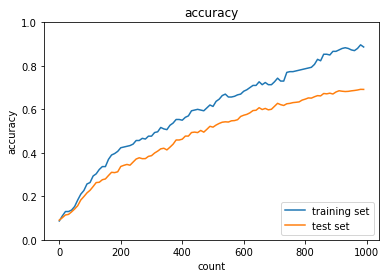

In [27]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## dropout_ratioの値を変更

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.0978
Generation: 20. 正答率(トレーニング) = 0.14333333333333334
                : 20. 正答率(テスト) = 0.1238
Generation: 30. 正答率(トレーニング) = 0.18333333333333332
                : 30. 正答率(テスト) = 0.1594
Generation: 40. 正答率(トレーニング) = 0.22333333333333333
                : 40. 正答率(テスト) = 0.187
Generation: 50. 正答率(トレーニング) = 0.24666666666666667
                : 50. 正答率(テスト) = 0.2093
Generation: 60. 正答率(トレーニング) = 0.27666666666666667
                : 60. 正答率(テスト) = 0.2338
Generation: 70. 正答率(トレーニング) = 0.2833333333333333
                : 70. 正答率(テスト) = 0.2493
Generation: 80. 正答率(トレーニング) = 0.31
                : 80. 正答率(テスト) = 0.2669
Generation: 90. 正答率(トレーニング) = 0.35
                : 90. 正答率(テスト) = 0.296
Generation: 100. 正答率(トレーニング) = 0.37666666666666665
                : 100. 正答率(テスト) = 0.2975
Generation: 110. 正答率(トレーニング) = 0.4166666666666667
                : 110. 正答率(テスト) = 0.3227
Generation: 120. 正答率(トレーニング) = 0.43
          

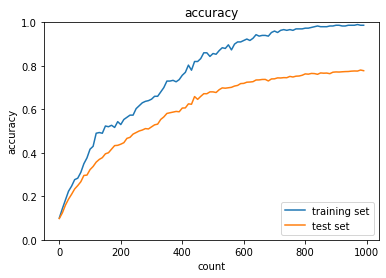

In [31]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## optimizerとdropout_ratioの値を変更

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.2966666666666667
                : 10. 正答率(テスト) = 0.2181
Generation: 20. 正答率(トレーニング) = 0.42333333333333334
                : 20. 正答率(テスト) = 0.3443
Generation: 30. 正答率(トレーニング) = 0.5366666666666666
                : 30. 正答率(テスト) = 0.4406
Generation: 40. 正答率(トレーニング) = 0.5366666666666666
                : 40. 正答率(テスト) = 0.4371
Generation: 50. 正答率(トレーニング) = 0.58
                : 50. 正答率(テスト) = 0.4966
Generation: 60. 正答率(トレーニング) = 0.6333333333333333
                : 60. 正答率(テスト) = 0.5358
Generation: 70. 正答率(トレーニング) = 0.6866666666666666
                : 70. 正答率(テスト) = 0.5637
Generation: 80. 正答率(トレーニング) = 0.75
                : 80. 正答率(テスト) = 0.6185
Generation: 90. 正答率(トレーニング) = 0.8366666666666667
                : 90. 正答率(テスト) = 0.66
Generation: 100. 正答率(トレーニング) = 0.8533333333333334
                : 100. 正答率(テスト) = 0.6661
Generation: 110. 正答率(トレーニング) = 0.89
                : 110. 正答率(テスト) = 0.6789
Generation: 120. 正答率(トレーニング) = 0.91
              

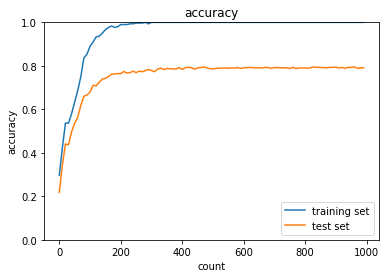

In [32]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.05)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12666666666666668
                : 10. 正答率(テスト) = 0.1118
Generation: 20. 正答率(トレーニング) = 0.15
                : 20. 正答率(テスト) = 0.1404
Generation: 30. 正答率(トレーニング) = 0.20333333333333334
                : 30. 正答率(テスト) = 0.165
Generation: 40. 正答率(トレーニング) = 0.21333333333333335
                : 40. 正答率(テスト) = 0.1917
Generation: 50. 正答率(トレーニング) = 0.25333333333333335
                : 50. 正答率(テスト) = 0.2166
Generation: 60. 正答率(トレーニング) = 0.27
                : 60. 正答率(テスト) = 0.2357
Generation: 70. 正答率(トレーニング) = 0.2866666666666667
                : 70. 正答率(テスト) = 0.2576
Generation: 80. 正答率(トレーニング) = 0.3433333333333333
                : 80. 正答率(テスト) = 0.2867
Generation: 90. 正答率(トレーニング) = 0.37333333333333335
                : 90. 正答率(テスト) = 0.3041
Generation: 100. 正答率(トレーニング) = 0.3933333333333333
                : 100. 正答率(テスト) = 0.3246
Generation: 110. 正答率(トレーニング) = 0.39666666666666667
                : 110. 正答率(テスト) = 0.3352
Generation: 120. 正答率(トレーニング) =

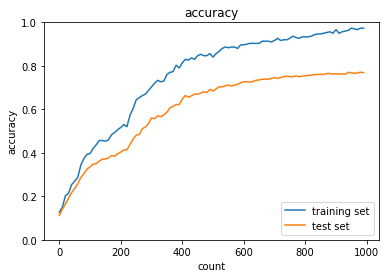

In [33]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1の学習率の変更

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.27666666666666667
                : 10. 正答率(テスト) = 0.2343
Generation: 20. 正答率(トレーニング) = 0.34
                : 20. 正答率(テスト) = 0.2879
Generation: 30. 正答率(トレーニング) = 0.41
                : 30. 正答率(テスト) = 0.3282
Generation: 40. 正答率(トレーニング) = 0.47333333333333333
                : 40. 正答率(テスト) = 0.3568
Generation: 50. 正答率(トレーニング) = 0.55
                : 50. 正答率(テスト) = 0.453
Generation: 60. 正答率(トレーニング) = 0.6433333333333333
                : 60. 正答率(テスト) = 0.5138
Generation: 70. 正答率(トレーニング) = 0.69
                : 70. 正答率(テスト) = 0.5651
Generation: 80. 正答率(トレーニング) = 0.77
                : 80. 正答率(テスト) = 0.5943
Generation: 90. 正答率(トレーニング) = 0.7766666666666666
                : 90. 正答率(テスト) = 0.6348
Generation: 100. 正答率(トレーニング) = 0.8366666666666667
                : 100. 正答率(テスト) = 0.6467
Generation: 110. 正答率(トレーニング) = 0.8366666666666667
                : 110. 正答率(テスト) = 0.6395
Generation: 120. 正答率(トレーニング) = 0.8633333333333333
                : 120. 正答率

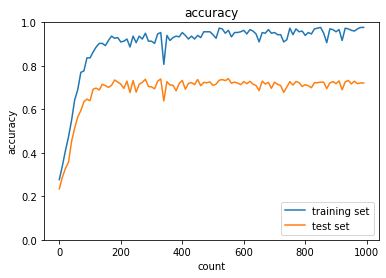

In [39]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.09
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.06

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()